### 2) Read the image shown below. Use snake active contour model to obtain two separate contours around the (a) Yellow yolk (b) Egg white. 
### Compare the difference in values of “alpha”, “beta”, and Number of iterations needed for convergence, for the two contours.

In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2
%matplotlib inline

###  1. Reading an image

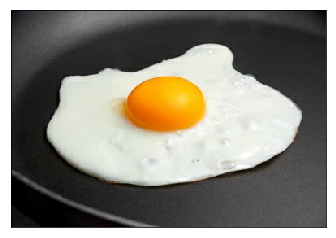

In [2]:
img = cv2.imread('./images/2.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR)), plt.xticks([]), plt.yticks([])
plt.show()

#### Topic insight :

Snake Active Contour Model : To find contour around an object, which is useful for image segementation.
Often edges are fragmented so we use active contour model to intergrate it over distance to get smooth contours

### 2. Setting up intial boundary around an object ( user help step)

In [3]:
# follwing x and y is setting up an intial boundary to an object we wnt to detect an edge 
# x moves the circular/oval boundary wrt x axis ,  and y moves the circular/oval boundary wrt y axis 

k = np.linspace(0, 2*np.pi, 400)
x = 189 + 80*np.cos(k)  # intercept moves the whole boundary right or left , and coef will reshape the boundary wrt x axis
y = 120 + 40*np.sin(k)
init_bound = np.array([x, y]).T


### 3. Invoking active_contour function by passing params alpha , bita , gamma

In [4]:
# alpha and bita works for detecting a curve around object 

snake = active_contour(gaussian(img, 3),
                       init_bound, alpha=0.2, beta=10, gamma=0.01)


/home/tolani/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


In [6]:
# same shape of both
snake.shape
init_bound.shape

(400, 2)

### 4. Plotting contour representation around yellow yolk

[0, 388, 268, 0]

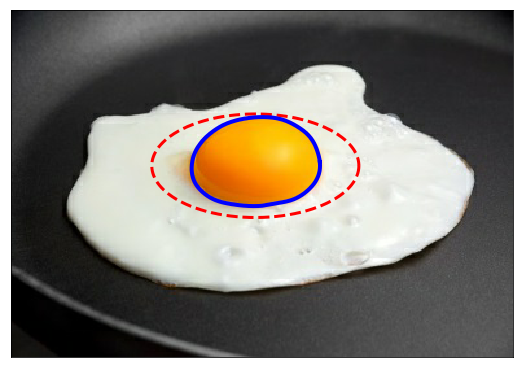

In [7]:
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
ax.plot(init_bound[:, 0],init_bound[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=4)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

### How it works ? : By setting alpha , bita and gamma parameters

alpha and bita works for detecting a contour around object 

alpha : it defines elastic force : for shrinking and exapnding contour
bita : bending energy : smoothness of curve around an object
gamma : it considers image features : lower the value of gamma higher you consider the image features 
      : gamma decides that how well the curve matches the image data

### 5. Likewise, repeating the steps for egg white : just by setting intial boundary around egg white

/home/shashikant/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


[0, 388, 268, 0]

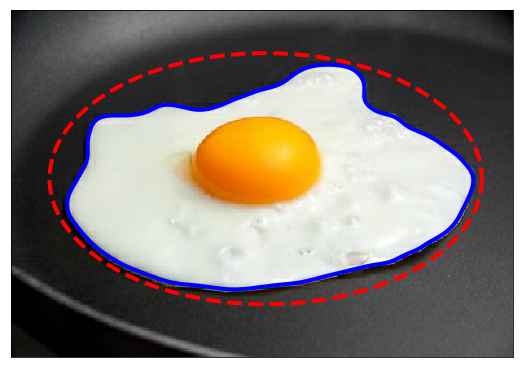

In [8]:
s = np.linspace(0, 2*np.pi, 400)
x = 197 + 167*np.cos(s)     
y = 130 + 97*np.sin(s)
init = np.array([x, y]).T

# calling active contour fun
snake = active_contour(gaussian(img, 3),
                       init, alpha=0.01, beta=0.1, gamma=0.01)

# plotting contour repn
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
ax.plot(init[:, 0], init[:, 1], '--r', lw=4)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=4)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

### Observation :

In case of egg white high value of bita is not smoothing the curve according to image ,so low bita is working here because it smoothes the curve to bend at various places and alpha is enough to stretch the contour around the curves but high value of bita is not allowing it to bend at diff places ,so low bita will allow it to so

experiment with bita values : 100 , 10 , 1 , 0.7 , 0.1 : it is perfect at 0.1
